In [9]:
import sqlite3
import os
import os.path
from os import listdir, getcwd
from IPython.core.display import Image
import numpy as np
import gc

In [1]:
import emoji


In [6]:
emoji.demojize("✔️ + ☑️ + 🔁 + 🔥 + 👍🏿 + 😄 + 😁")

':check_mark: + :check_box_with_check: + :repeat_button: + :fire: + :thumbs_up_dark_skin_tone: + :grinning_face_with_smiling_eyes: + :beaming_face_with_smiling_eyes:'

In [7]:
emoji.emojize(':check_mark:')

'✔️'

In [ ]:
import cv2
nparr = np.frombuffer(db_handler.extract_picture(content_id)[1], np.uint8)
img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

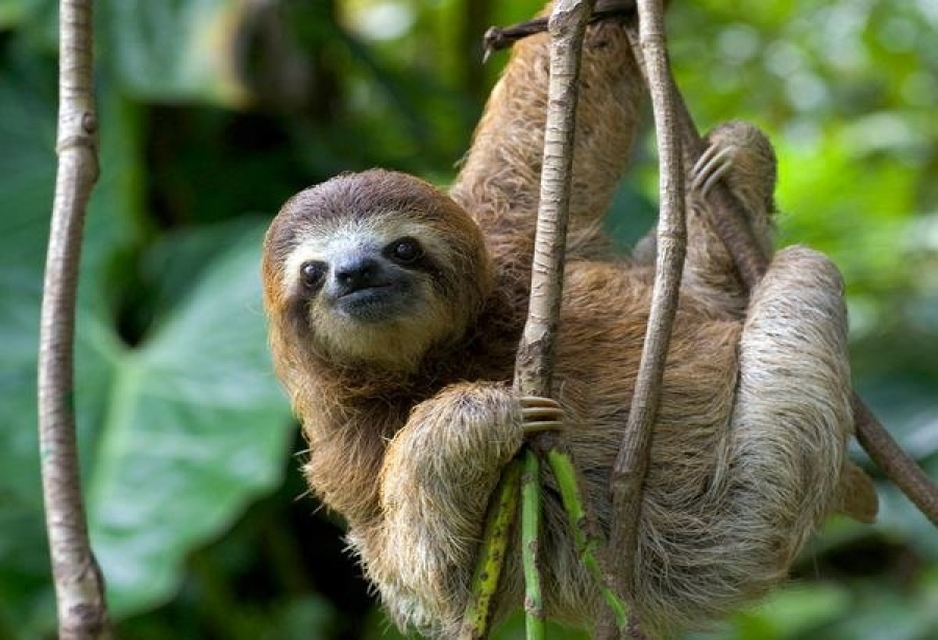

In [12]:
Image(check.extract_picture(122)[0])

In [35]:
img_np.shape

(640, 938, 3)

In [53]:
np.moveaxis(img_np, 2, 0).shape

(3, 640, 938)

In [1]:
from utils import *

check = DBHandler('./picture_db.sqlite')
# filepath = os.path.abspath(filepath)

Schema exists



In [2]:
cx = check.insert_picture('./data/images/content.jpg')

In [10]:
{'content', 'style'} - {'content'}

set

In [11]:
{} is empty

False

In [24]:
DBHandler.__dict__

mappingproxy({'__module__': 'utils',
              '__init__': <function utils.DBHandler.__init__(self, db_file: str = './picture_db.sqlite')>,
              'connect_db': <function utils.DBHandler.connect_db(self)>,
              'close_db': <function utils.DBHandler.close_db(self)>,
              'insert_picture': <function utils.DBHandler.insert_picture(self, picture_file: str) -> int>,
              'fetchall_async': <function utils.DBHandler.fetchall_async(self, query: str)>,
              'fetchone_async': <function utils.DBHandler.fetchone_async(self, query: str)>,
              'insert_async': <function utils.DBHandler.insert_async(self, cursor, query: str, args: list, get_id: bool = True)>,
              'extract_picture': <function utils.DBHandler.extract_picture(self, picture_id: int) -> tuple[str, bytes]>,
              'chk_conn': <function utils.DBHandler.chk_conn(self)>,
              '__del__': <function utils.DBHandler.__del__(self)>,
              '__dict__': <attribu

In [9]:
filepath = os.path.abspath('./picture_db.sqlite')
filepath

'c:\\Users\\Aleksey\\Documents\\[important]courses\\[1active]dls\\sem1\\9_project\\nst_tgbot\\picture_db.sqlite'

In [50]:
conn = create_or_open_db('picture_db.sqlite')

Schema exists



In [51]:
type(conn)

sqlite3.Connection

In [49]:
del conn
del cur

In [38]:
picture_file = "./data/images/content.jpg"
content_id = insert_picture(conn, picture_file)

23
<class 'int'>


In [35]:
cur = conn.cursor

In [41]:
filename, ablob = extract_picture(conn, 23)

In [55]:
type(ablob)

bytes

In [41]:

class DBHandler():
    def __init__(self, db_file: str='./picture_db.sqlite'):
        super(DBHandler, self).__init__()
        db_is_new = not os.path.exists(db_file)
        self.conn = None
        self.db_file = os.path.abspath(db_file)
        self.connect_db()
        if db_is_new:
            print('Creating schema')
            sql = '''create table if not exists PICTURES(
            ID INTEGER PRIMARY KEY AUTOINCREMENT,
            PICTURE BLOB,
            TYPE TEXT,
            FILE_NAME TEXT);'''
            await self.conn.execute(sql)   
            print('Created')
        else:
            print('Schema exists\n') 
        self.close_db()

    async def connect_db(self):
        self.conn = await aiosqlite.connect(self.db_file)

    async def close_db(self):
        await self.conn.close()

    def insert_picture(self, picture_file: str) -> int:
        with open(picture_file, 'rb') as input_file:
            ablob = input_file.read()
            base=os.path.basename(picture_file)
            afile, ext = os.path.splitext(base)
            self.connect_db()
            sql = '''INSERT INTO PICTURES
            (PICTURE, TYPE, FILE_NAME)
            VALUES(?, ?, ?);'''
            cursor = self.conn.cursor()
            cursor.execute(sql,[sqlite3.Binary(ablob), ext, afile]) 
            await self.conn.commit()
            picture_id = await cursor.lastrowid
        self.close_db()
        return picture_id

    # async def fetchall_async(self, query: str):
    #     loop = asyncio.get_event_loop()
    #     return await loop.run_in_executor(
    #         None, lambda: self.conn.cursor().execute(query).fetchall())
    
    # async def fetchone_async(self, query: str):
    #     loop = asyncio.get_event_loop()
    #     return await loop.run_in_executor(
    #         None, lambda: self.conn.cursor().execute(query).fetchone())

    # async def insert_async(self, query: str, args: list):
    #     loop = asyncio.get_event_loop()
    #     return await loop.run_in_executor(
    #         None, lambda: self.conn.cursor().execute(query, args)
    #     )

    def extract_picture(self, picture_id: int) -> tuple[str, bytes]:
        self.connect_db()
        cursor = self.conn.cursor()
        sql = "SELECT PICTURE, TYPE, FILE_NAME FROM PICTURES WHERE id = :id"
        param = {'id': picture_id}
        cursor.execute(sql, param)
        ablob, ext, afile = cursor.fetchone()
        filename = afile + ext
        self.close_db()
        return filename, ablob

    def chk_conn(self):
     try:
        self.conn.cursor()
        return True
     except Exception as ex:
        return False

    def __del__(self):
        print('Deleting database')
        if self.chk_conn():
            self.conn.close()
        else:
            print('Deleted')
        # gc.collect()

SyntaxError: 'await' outside async function (1825516234.py, line 15)

In [8]:
import aiosqlite
import aiofiles
import asyncio

In [32]:
async def read_picture(filename: str):
    async with aiofiles.open(filename, mode='rb') as f:
        contents = await f.read()
    return contents

In [33]:
picture = await read_picture('./data/images/content.jpg')

In [21]:
import aiofiles.os
import os

In [10]:
await os.path.abspath('./data/content.jpg')

AttributeError: module 'aiofiles.ospath' has no attribute 'abspath'

In [11]:
from aiopath import AsyncPath as Path

Path('./data/images/content.jpg').stem

'content'

In [1]:
import requests
response = requests.get('https://api.telegram.org/file/bot5422686280:AAE_iEukleZCE3ld_5MfyU8EZFnTtsRF3Ts/photos/file_4.jpg')

In [7]:
# response.content

In [30]:
with open('file.txt', mode='wb') as check_file:
    check_file.write(response.content)
with open('file.txt', mode='rb') as check_file:
    check = check_file.read()
response.content == check

True

In [25]:
os.path.exists('./tmp/1')

False

In [3]:
from utils import DBHandler

In [4]:
check = DBHandler('users_db.sqlite')

Schema exists



In [15]:
import sqlite3
connection = sqlite3.connect('users_db.sqlite')
cursor = connection.execute('select * from PICTURES')
names = list(map(lambda x: x[0], cursor.description))

In [1]:
# cursor = connection.cursor()
# cursor.execute(f'SELECT CONTENT from PICTURES WHERE USERID={122}')
# # cursor.fetchone()

In [20]:
connection.execute(f'SELECT CONTENT from PICTURES WHERE USERID={122}')

In [10]:
print(names)

['USERID', 'CONTENT', 'STYLE']


In [3]:
check.insert_id(122)

Users exists


In [9]:
# response.content

In [5]:
check.insert_picture_by_bytes(122, response.content, 'style')

Обновлено


In [4]:
check.insert_picture(122, './data/style.jpg', 'style')

UPDATE PICTURES SET
            STYLE = ? WHERE USERID=?;
Обновлено


In [6]:
k = check.extract_picture(122, both=True)

In [21]:
yes = '''You have uploaded {chosen_type} image.
It is a time to upload {to_upload}'''.format(
                chosen_type='chosen_type',
                to_upload={'check'}.pop())
yes

'You have uploaded chosen_type image.\nIt is a time to upload check'

In [1]:
d = {'a': 1, 'b': 2}

In [4]:
for key in d.keys():
    print(key)

a
b


In [12]:
class DB():
    def __init__(self, db_file: str='./picture_db.sqlite'):
        db_is_new = not os.path.exists(db_file)
        self.conn = None
        self.db_file = os.path.abspath(db_file)
        if db_is_new:
            print('Creating schema')
            sql = '''create table if not exists PICTURES(
            ID INTEGER PRIMARY KEY AUTOINCREMENT,
            PICTURE BLOB,
            TYPE TEXT,
            FILE_NAME TEXT);'''
            self.conn.execute(sql)   
            print('Created')
        else:
            print('Schema exists\n') 
        self.close_db()

    def connect_db(self):
        self.conn = sqlite3.connect()

class DBHandler():
    def __await__(self):
        return self._async_init().__await__()
    async def _async_init(self, db_file: str='./picture_db.sqlite'):
        # super(DBHandler, self).__init__()
        db_is_new = not await os.path.exists(db_file)
        self.conn = None
        self.db_file = await Path(db_file).resolve()
        await self.connect_db()
        if db_is_new:
            print('Creating schema')
            sql = '''create table if not exists PICTURES(
            ID INTEGER PRIMARY KEY AUTOINCREMENT,
            PICTURE BLOB,
            TYPE TEXT,
            FILE_NAME TEXT);'''
            await self.conn.execute(sql)   
            print('Created')
        else:
            print('Schema exists\n') 
        await self.close_db()

    async def connect_db(self):
        self.conn = await aiosqlite.connect(self.db_file)

    async def close_db(self):
        await self.conn.close()

    async def insert_picture(self, picture_file: str) -> int:
        async with aiofiles.open(picture_file, 'rb') as input_file:
            ablob = await input_file.read()
            base = Path(picture_file).name
            afile, ext = Path(picture_file).stem, Path(picture_file).suffix
            await self.connect_db()
            print(self.conn)
            sql = '''INSERT INTO PICTURES
            (PICTURE, TYPE, FILE_NAME)
            VALUES(?, ?, ?);'''
            cursor = await self.conn.cursor()
            cursor.execute(sql,[sqlite3.Binary(ablob), ext, afile]) 
            await self.conn.commit()
            picture_id = await cursor.lastrowid
        self.close_db()
        return picture_id

In [16]:
db_handler = DBHandler()

In [18]:
db_handler.insert_picture()

TypeError: insert_picture() missing 1 required positional argument: 'picture_file'

In [15]:
await db_handler.insert_picture

AttributeError: 'NoneType' object has no attribute 'insert_picture'

In [19]:
await db_handler.insert_picture('./data/content.jpg')

AttributeError: 'DBHandler' object has no attribute 'db_file'